In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches


In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Helvetica"
})

bigger_font_size=10
column_width = 3.375
double_stack=(0.75*column_width,0.7*column_width)

orange = plt.get_cmap("Oranges")
purple = plt.get_cmap("Purples")

data_prepend = './'
data_prepend = 'public_data/'


#### Figure 4

In [3]:
N = 12
frac_test = 0.25
frac_train = 1-frac_test

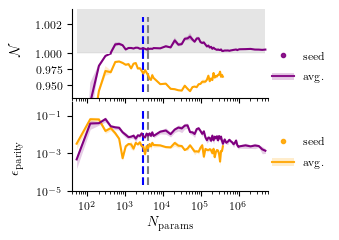

In [4]:
seeds = np.arange(10,101,10)
bad_seeds= [10,50,60,80]
bad_seeds_index = [0, 4, 5, 7]
show_seeds = False

fig = plt.figure(figsize=double_stack)
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 2], hspace=0.05) 

ax0 = fig.add_subplot(gs[1])
gs1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], height_ratios=[1, 1], hspace=0.0)
ax1_top = fig.add_subplot(gs1[0], sharex=ax0)
ax1_bottom = fig.add_subplot(gs1[1], sharex=ax0)
ax1_top.set_ylim(0.999991, 1.003) 
ax1_bottom.set_ylim(0.93, 0.99999)   
ax1_top.spines['bottom'].set_visible(False)
ax1_bottom.spines['top'].set_visible(False)
ax1_top.set_yticks([1.00,1.002])
ax1_top.set_yticklabels(['$1.000$','$1.002$'])

path = data_prepend + 'A28/IsingChain_h-1.0_N12/TestTrain/testSize0.25_random/hellinger/bs_64/'
normalizations = np.load(path+'normalizations.npy',allow_pickle=True).item()
parity_ratio_dict = np.load(path+'parity_ratios.npy',allow_pickle=True).item()
num_params_dict = np.load(path+'num_params_dict.npy',allow_pickle=True).item()

if show_seeds:
    for seed_i,seed in enumerate(seeds):
        for key_i,key in enumerate(normalizations.keys()):
            (depth_,width_) = key
            norm = (np.array(normalizations[key]))[seed_i]
            parity_rat = (np.array(parity_ratio_dict[key]))[seed_i]
            num_params = num_params_dict[key]
            if seed in bad_seeds:
                ax0.scatter(num_params, parity_rat,marker='.',color=orange(seed/max(seeds)),alpha=0.6,s=8)
                ax1_top.scatter(num_params, norm,marker='.',color=orange(seed/max(seeds)),alpha=0.6,s=8)
                ax1_bottom.scatter(num_params, norm,marker='.',color=orange(seed/max(seeds)),alpha=0.6,s=8)

sorted_keys = sorted(num_params_dict.keys(), key=lambda k: num_params_dict[k])
x_vals = []
ratio_means, ratio_sems = [], []
norm_means, norm_sems = [], []
for key in sorted_keys:
    num_params = num_params_dict[key]
    x_vals.append(num_params)
    ratio_vals = np.array(parity_ratio_dict[key])
    ratio_means.append(np.mean(ratio_vals[bad_seeds_index]))
    ratio_sems.append(np.std(ratio_vals[bad_seeds_index], ddof=1) / np.sqrt(len(ratio_vals)))
    norm_vals = np.array(normalizations[key])
    norm_means.append(np.mean(norm_vals[bad_seeds_index]))
    norm_sems.append(np.std(norm_vals[bad_seeds_index], ddof=1) / np.sqrt(len(norm_vals)))
norm_means = np.array(norm_means)
norm_sems = np.array(norm_sems)
ratio_means = np.array(ratio_means)
ratio_sems = np.array(ratio_sems)

x_vals = np.array(x_vals)
ax0.errorbar(x_vals, ratio_means,  fmt='-', color='orange', label="Uniform Split", capsize=0)
ax0.fill_between(x_vals,ratio_means-ratio_sems, ratio_means+ratio_sems,linewidth=0,color='orange',alpha=0.2)
ax1_top.errorbar(x_vals, norm_means, fmt='-', color='orange', label="Uniform Split", capsize=0)
ax1_top.fill_between(x_vals,norm_means-norm_sems, norm_means+norm_sems,linewidth=0,color='orange',alpha=0.2)

ax1_bottom.errorbar(x_vals, norm_means, fmt='-', color='orange', label="Uniform Split", capsize=0)
ax1_bottom.fill_between(x_vals,norm_means-norm_sems, norm_means+norm_sems,linewidth=0,color='orange',alpha=0.2)

path = data_prepend + 'A29_largeWidths/IsingChain_h-1.0_N12/TestTrain/testSize0.25_probs/hellinger/bs_64/'
normalizations = np.load(path+'normalizations.npy',allow_pickle=True).item()
parity_ratio_dict = np.load(path+'parity_ratios.npy',allow_pickle=True).item()
num_params_dict = np.load(path+'num_params_dict.npy',allow_pickle=True).item()

if show_seeds:
    for seed_i,seed in enumerate(seeds):
        for key_i,key in enumerate(normalizations.keys()):
            (depth_,width_) = key
            norm = (np.array(normalizations[key]))[seed_i]
            parity_rat = (np.array(parity_ratio_dict[key]))[seed_i]
            num_params = num_params_dict[key]
            ax0.scatter(num_params, parity_rat,marker='.',color=purple(seed/max(seeds)),alpha=0.6,s=8)
            ax1_top.scatter(num_params, norm,marker='.',color=purple(seed/max(seeds)),alpha=0.6,s=8)
            if norm < 1:
                ax1_bottom.scatter(num_params, norm,marker='.',color=purple(seed/max(seeds)),alpha=0.6,s=8)

sorted_keys = sorted(num_params_dict.keys(), key=lambda k: num_params_dict[k])
x_vals = []
ratio_means, ratio_sems = [], []
norm_means, norm_sems = [], []
for key in sorted_keys:
    num_params = num_params_dict[key]
    x_vals.append(num_params)
    ratio_vals = np.array(parity_ratio_dict[key])
    ratio_means.append(np.mean(ratio_vals))
    ratio_sems.append(np.std(ratio_vals, ddof=1) / np.sqrt(len(ratio_vals)))
    norm_vals = np.array(normalizations[key])
    norm_means.append(np.mean(norm_vals))
    norm_sems.append(np.std(norm_vals, ddof=1) / np.sqrt(len(norm_vals)))
norm_means = np.array(norm_means)
norm_sems = np.array(norm_sems)
ratio_means = np.array(ratio_means)
ratio_sems = np.array(ratio_sems)

x_vals = np.array(x_vals)
ax0.errorbar(x_vals, ratio_means,  fmt='-', color='purple', label="Probability Split", capsize=0)
ax0.fill_between(x_vals,ratio_means-ratio_sems, ratio_means+ratio_sems,linewidth=0,color='purple',alpha=0.2)

ax1_top.errorbar(x_vals, norm_means, fmt='-', color='purple', label="Probability Split", capsize=0)
ax1_top.fill_between(x_vals,norm_means-norm_sems, norm_means+norm_sems,linewidth=0,color='purple',alpha=0.2)

mask = x_vals <= 5*10**2
x_vals_masked = x_vals[mask]
norm_means_masked = norm_means[mask]
norm_sems_masked = norm_sems[mask]
ax1_bottom.errorbar(x_vals_masked, norm_means_masked, fmt='-', color='purple', label="Probability Split", capsize=0)
ax1_bottom.fill_between(x_vals_masked,norm_means_masked-norm_sems_masked, norm_means_masked+norm_sems_masked,linewidth=0,color='purple',alpha=0.2)


fig.text(-0.12, 0.7, r'$\mathcal{N}$', va='center', rotation='vertical', fontsize=bigger_font_size)
fig.text(-0.12, 0.25, r'$\epsilon_\mathrm{parity}$', va='center', rotation='vertical', fontsize=bigger_font_size)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)
ax1_top.spines.bottom.set_visible(False)
ax1_bottom.spines.top.set_visible(False)
ax1_bottom.spines['top'].set_visible(False)
ax1_bottom.spines['right'].set_visible(False)
ax1_top.spines['top'].set_visible(False)
ax1_top.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1_top.set_xticks([])
ax1_top.tick_params(labeltop=False)
ax1_top.tick_params(axis='x', which='both', bottom=False, top=False)
ax1_bottom.xaxis.tick_bottom()
ax1_bottom.xaxis.set_tick_params(which='both', labelbottom=False)

ax1_top.fill_between(x_vals,1.00,1.003,color='grey',alpha=0.2,zorder=-1, linewidth=0,edgecolor='none')
ax1_top.hlines(1., min(x_vals), max(x_vals), linewidth=0.1, color='grey', zorder=-1)
ax1_bottom.set_xscale('log')

ax0.vlines(2**N,2*10**-5,2*10**-1,linestyle='--',color='grey',zorder=-1)
ax0.vlines(2**N*frac_train,2*10**-5,2*10**-1,linestyle='--',color='b',zorder=-1)

ax1_bottom.vlines(2**N,0.94,1.00,linestyle='--',color='grey',zorder=-1)
ax1_bottom.vlines(2**N*frac_train,0.94,1.00,linestyle='--',color='b',zorder=-1)
ax1_top.vlines(2**N,0.9999,1.0025,linestyle='--',color='grey',zorder=-1)
ax1_top.vlines(2**N*frac_train,0.9999,1.0025,linestyle='--',color='b',zorder=-1)

ax0.set_ylim(1e-5, 5e-1)
ax0.set_xlim(4*10**1,6*10**6)

train_patch = mpatches.Patch(color='purple',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='orange',alpha=0.2,linewidth=0)
empty_fig1 = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='white',alpha=0,label=r'')
empty_fig3 = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='white',alpha=0,label=r'')
train_line = plt.Line2D([0], [0], color='purple',alpha=0.9,label=r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='orange',alpha=0.9,label=r'$\mathrm{avg.}$')
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='purple',alpha=0.9,label=r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='orange',alpha=0.9,label=r'$\mathrm{seed}$')
handles = [
    empty_fig1,
    train_marker, (train_patch,train_line),
    empty_fig3,
    empty_fig3,
    test_marker, (test_patch,test_line)]
labels = [empty_fig1.get_label(),train_marker.get_label(),train_line.get_label(),
        empty_fig3.get_label(),empty_fig3.get_label(),test_marker.get_label(),test_line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.875,0.5),labelspacing=1)

plt.savefig(f'./figures/parity_norm_err.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()